In [26]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('HeightWeight.csv')
h = data['Height']
w = data['Weight']
hwarr = [[h[i],w[i]]for i in range(len(h))]
print(len(hwarr))


10000


In [28]:
def generate_custom_sine_wave(num_points,seed):
    random.seed(seed)
    x = [random.uniform(-1,1) for _ in range(num_points)]
    y = [np.sin(np.pi * i) for i in x]
    # y = [np.sin(np.pi * i)+np.random.normal(0,0.5,1)[0] for i in x]
    xy = [[x[i],y[i]] for i in range(num_points)]
    return xy

def first_ele(arr):
    return arr[0]

def bias2(m,b,xy):
    xy.sort(key=first_ele)
    x_values = list(np.linspace(-1, 1, len(xy)))
    bi2 = [((m*xy[i][0]+b) - xy[i][1])**2 for i in range(len(xy))]
    # bi2 = [((m*x+b) - np.sin(np.pi*x))**2 for x in x_values]
    return sum(bi2)/len(bi2)

def sumgdx(mbar,bbar,m,b,x):
    y = 0
    for i in range(len(m)):
        y += (((m[i]*x+b[i]) - (mbar*x+bbar))**2)
    return y/len(b)


def rand_train(data,percent,seed):
    import random
    n = int((percent/100)*len(data))
    test = [i for i in data]
    random.seed(seed)
    train_elements = random.sample(data, n)
    for i in train_elements:
       test.remove(i) 
    return train_elements,test

def rand_train_val(data,n,seed):
    import random
    test = [i for i in data]
    random.seed(seed)
    train_elements = random.sample(data, n)
    for i in train_elements:
       test.remove(i) 
    return train_elements,test

def cor(xy):
    x = [i[0] for i in xy]
    y = [i[1] for i in xy]
    n = len(x)
    ex = sum(x)
    ey = sum(y)
    exy = sum([x[i]*y[i] for i in range(n)])
    exx = sum([x[i]**2 for i in range(n)])
    eyy = sum([y[i]**2 for i in range(n)])
    r = (n*exy-ex*ey)/(((n*exx-ex**2)*(n*eyy-ey**2))**(1/2))
    return r

def rmse(m,c,xy):
    data = [((m*i[0]+c)-i[1])**2 for i in xy]
    return (sum(data)/(len(xy)))**(1/2)

def se(m,c,xy):
    data = [((m*i[0]+c)-i[1])**2 for i in xy]
    return (sum(data)/(len(xy)))
def mae(m,c,xy):
    data = [abs((m*i[0]+c)-i[1]) for i in xy]
    return (sum(data)/(len(xy)))

def rae(m,c,xy):
    maeval = mae(m,c,xy)
    y = [i[1] for i in xy]
    my = sum(y)/len(y)
    temp = [abs(i - my) for i in y]
    deno = (1/len(y))*sum(temp)
    return maeval/deno

def rrse(m,b,xy):
    ybar = sum([xy[1] for xy in xy])/len(xy)
    uppersum = sum([(xy[1]-(m*xy[0]+b))**2 for xy in xy])
    lowersum = sum([(xy[1]-ybar)**2 for xy in xy])
    result = np.sqrt(uppersum/lowersum)
    return result

def normal_eq(xy):
    x = [xy[i][0] for i in range(len(xy))]
    y = [xy[i][1] for i in range(len(xy))]

    n = len(x)
    ex = sum(x)
    ey = sum(y)
    exy = sum([x[i]*y[i] for i in range(n)])
    exx = sum([x[i]**2 for i in range(n)])
    m = (n*exy-ex*ey)/(n*exx-ex**2) 
    b = (ey-m*ex)/n

    # print(f"slope:{m}        intersect:{c}")

    # plt.scatter(x, y, color='blue')
    # plt.plot(x,[m*xi+b for xi in x])
    # plt.show()

    return m,b

def all_calculator(train,test,metric):
    m,b = normal_eq(train)
    # result['slope'] = m
    # result['intercept'] = b
    # print(result)
    if metric == 'cor':
        result = round(cor(test),4)
    elif metric == 'mae':
        result = round(mae(m,b,test),4)
    elif metric == 'rmse':
        result = round(rmse(m,b,test),4)
    elif metric == 'se':
        result = round(se(m,b,test),4)
    elif metric == 'rae':
        result = round(rae(m,b,test),4)
    elif metric == 'rrse':
        result = round(rrse(m,b,test),4)

    return result

        

In [3]:


# train,test = rand_train(hwarr,10,1)
# print(test)
# print(train)

# print(all_calculator(train,test))


In [30]:

def table(arr,maxseed,metric,increment):
    data = {'seed':[i for i in range(1,maxseed+1)]}
    data['seed'].append('Average')
    data['seed'].append('SD')
    
    for percent in range(90,9,-increment):
        data[f'{percent}%'] = []
    for seed in range(1,maxseed+1):
        for percent in range(90,9,-increment):
            train,test = rand_train(arr,percent,seed)
            val = all_calculator(train,test,metric)
            data[f'{percent}%'].append(val)
    count = 0
    for percent in range(90,9,-increment):
        count += 1
        values = data[f'{percent}%']
        avg = sum(values)/len(values)
        sd = (sum([(x-avg)**2 for x in values])/(len(values)-1))**(1/2)
        data[f'{percent}%'].append(round(avg,4))
        data[f'{percent}%'].append(round(sd,4))

    # print(count)
    csv = pd.DataFrame(data = data)
    return csv

def holdout(arr,outseed,inseed,metric,percent):
    data = {'seed':[i for i in range(1,outseed+1)],f'Holdout {percent}%': []}
    data['seed'].append('Average')
    data['seed'].append('SD')

    for oseed in range(1,outseed+1):
        random.seed(oseed)
        elements_20 = random.sample(arr, 20)
        values = []
        # for iseed in range(1,inseed+1):
        train,test = rand_train(elements_20,percent,10)
        val = all_calculator(train,test,metric)
        values.append(val)
        
        avg = round(sum(values)/len(values),4)
        data[f'Holdout {percent}%'].append(avg)
    
    values = data[f'Holdout {percent}%']
    avg = sum(values)/len(values)
    sd = (sum([(x-avg)**2 for x in values])/(len(values)-1))**(1/2)

    data[f'Holdout {percent}%'].append(round(avg,4))
    data[f'Holdout {percent}%'].append(round(sd,4))

    csv = pd.DataFrame(data = data)
    csv.to_csv(f'holdout{percent}.csv',index=False)
    return csv

def train(arr,outseed,metric):
    data = {'seed':[i for i in range(1,outseed+1)],f'Train': []}
    data['seed'].append('Average')
    data['seed'].append('SD')

    for oseed in range(1,outseed+1):
        random.seed(oseed)
        elements_20 = random.sample(arr, 20)
        values = []
        # for iseed in range(1,inseed+1):
        # train,test = rand_train(elements_20,percent,10)
        val = all_calculator(elements_20,elements_20,metric)
        values.append(val)
        
        avg = round(sum(values)/len(values),4)
        data[f'Train'].append(avg)
    
    values = data[f'Train']
    avg = sum(values)/len(values)
    sd = (sum([(x-avg)**2 for x in values])/(len(values)-1))**(1/2)

    data[f'Train'].append(round(avg,4))
    data[f'Train'].append(round(sd,4))

    csv = pd.DataFrame(data = data)
    csv.to_csv(f'Train.csv',index=False)
    return csv



holdout(hwarr,10,100,'rmse',50)
    
# train(hwarr,10,'rmse')
    

,seed,Holdout 50%
0,1,5.9504
1,2,6.1335
2,3,5.0708
3,4,5.1026
4,5,6.5158
5,6,5.1301
6,7,4.3899
7,8,6.8882
8,9,5.4911
9,10,4.8094


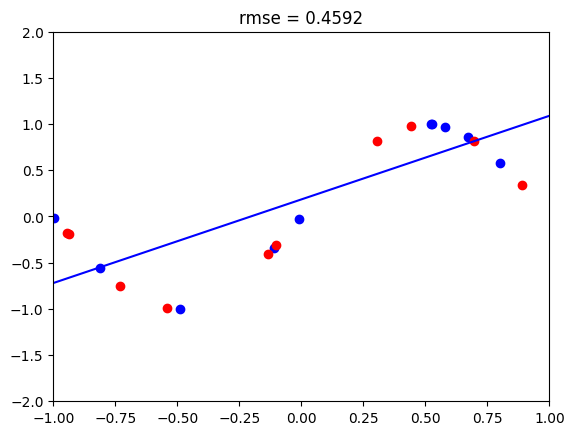

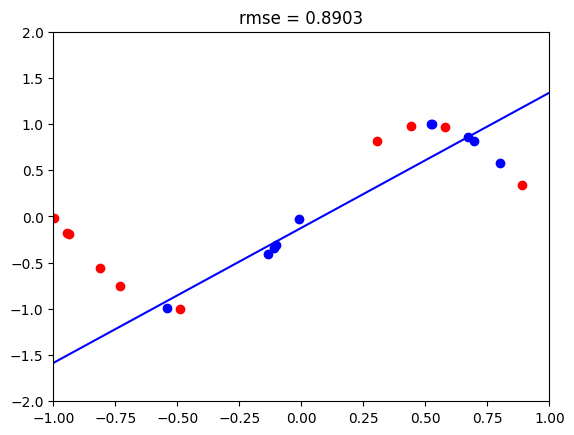

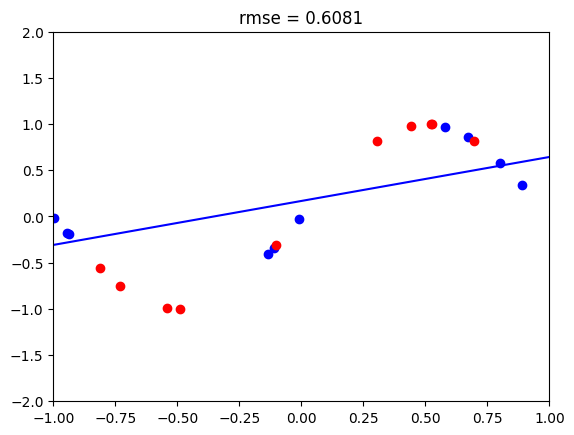

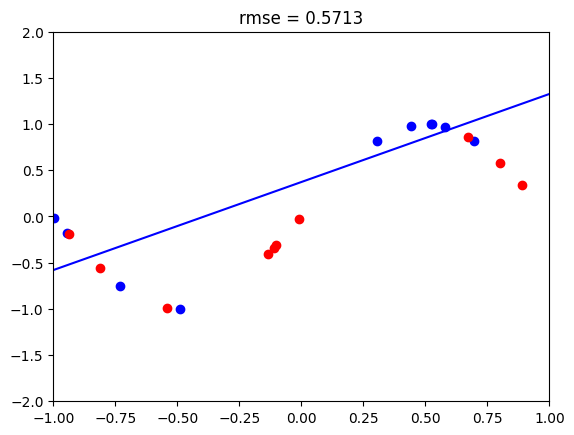

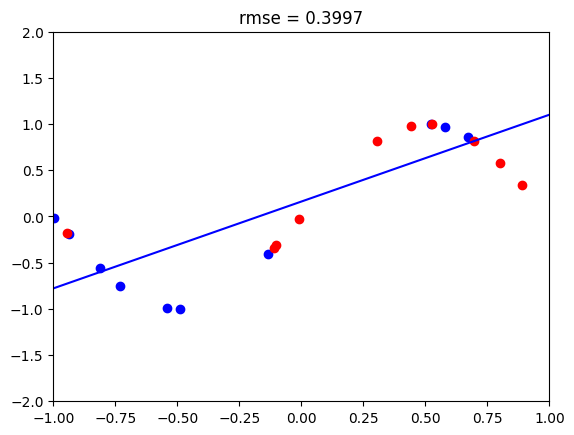

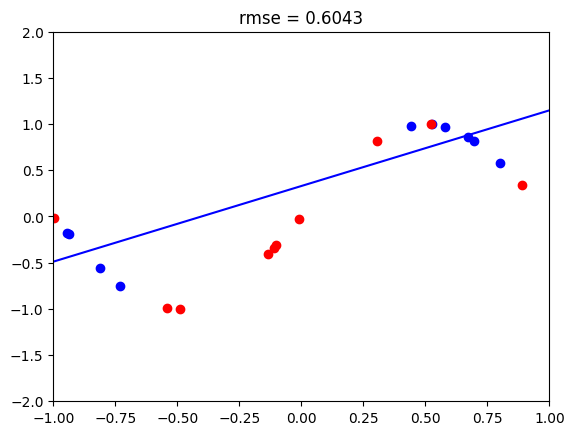

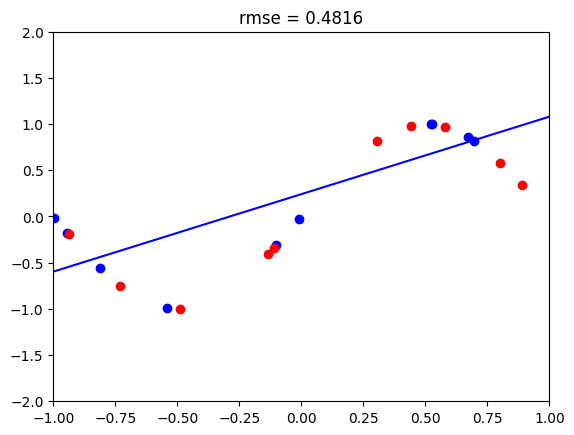

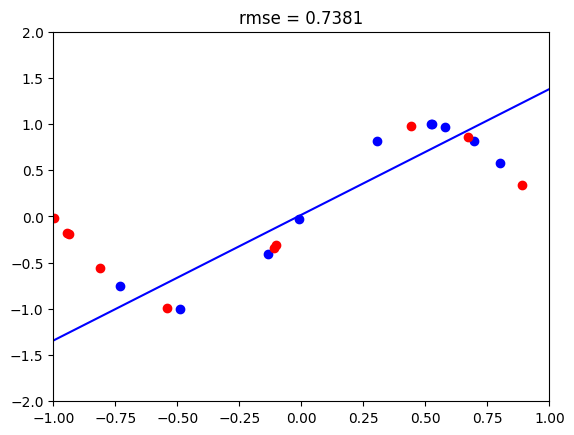

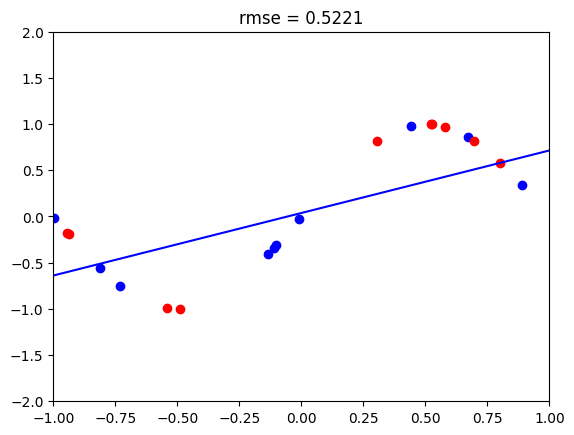

In [171]:
def plot(arr,percent,seed):
    train,test = rand_train(arr,percent,seed)
    m,b = normal_eq(train)
    # all_x = []
    # for i in train:
    #     all_x.append(i[0])
    # for i in test:
    #     all_x.append(i[0])
    val = all_calculator(train,test,'rmse')
    # print(val)
    
    plt.scatter([i[0] for i in train],[i[1] for i in train],color = 'blue')
    x = np.linspace(-1,1)
    # plt.ylim([0,150])
    # plt.xlim([120,200])
    plt.ylim([-2,2])
    plt.xlim([-1,1])
    plt.plot(x,[m*i+b for i in list(x)],color = 'blue')
    plt.title(f'rmse = {val}')
    plt.scatter([i[0] for i in test],[i[1] for i in test],color = 'red')
    plt.show()
xy = generate_custom_sine_wave(20,1)
for i in range(1,10):
    plot(xy,50,i)

In [5]:
# print(data)


# csv = table(100,'cor')
# csv.to_csv('10000/correlation_coefficient.csv',index=False)

# csv = table(100,'rmse')
# csv.to_csv('10000/root_mean_square.csv',index=False)

# csv = table(100,'mae')
# csv.to_csv('10000/mean_absolute_error.csv',index=False)

# csv = table(100,'rae')
# csv.to_csv('10000/relative_absolute_error.csv',index=False)

# csv = table(100,'rrse')
# csv.to_csv('10000/root_relative_squared_error.csv',index=False)


# print(csv)

In [6]:
dataset = [20,100,10000]
# dic = {'metric':['cor','mae','rmse','rae','rrse']}
dic={'sample':dataset}
for percent in range(90,1,-10):
    dic[f'{percent}%'] = []
for i in dataset:
    # correlation = pd.read_csv(f'{i}/correlation_coefficient.csv')
    # root_mean_square = pd.read_csv(f'{i}/root_mean_square.csv')
    # mean_absolute_error = pd.read_csv(f'{i}/mean_absolute_error.csv')
    # relative_absolute_error = pd.read_csv(f'{i}/relative_absolute_error.csv')
    root_relative_squared_error = pd.read_csv(f'{i}/root_relative_squared_error.csv')
    lis = root_relative_squared_error.loc[101].to_list()
    for percent in range(90,1,-10):
        i = percent//10
        dic[f'{percent}%'].append(lis[10-i])
    
print(pd.DataFrame(dic).to_csv('rrse.csv',index=False))

In [22]:
def gen(outseed,numpoint,maxseed,metric):
    tempout = []
    for i in range(1,outseed+1):
        for _ in range(1,maxseed+1):
            tempout.append(i)
    tempin = []
    for _ in range(1,outseed+1):
        for i in range(1,maxseed+1):
            tempin.append(i)

    data = {'outseed':tempout,'inseed':tempin}
    data['outseed'].append('Average')
    data['outseed'].append('SD')
    data['inseed'].append('Average')
    data['inseed'].append('SD')

    for i in range(numpoint-1,0,-1):
        data[i] = []


    for oseed in range(1,outseed+1):
        arr = generate_custom_sine_wave(numpoint,oseed)
        for i in range(numpoint-1,0,-1):
            for seed in range(1,maxseed+1):
                train,test = rand_train_val(arr,i,seed)
                val = all_calculator(train,test,metric)
                data[i].append(val)

    for i in range(numpoint-1,0,-1):
        values = data[i]
        avg = sum(values)/len(values)
        sd = (sum([(x-avg)**2 for x in values])/(len(values)-1))**(1/2)
        data[i].append(round(avg,4))
        data[i].append(round(sd,4))

    # print(data)

    csv = pd.DataFrame(data = data)
    return csv


    
    

/var/folders/l4/g4063s6d1zjcwtjdwk0lyb9m0000gn/T/ipykernel_1225/482575906.py:92: RuntimeWarning: invalid value encountered in scalar divide
  m = (n*exy-ex*ey)/(n*exx-ex**2)


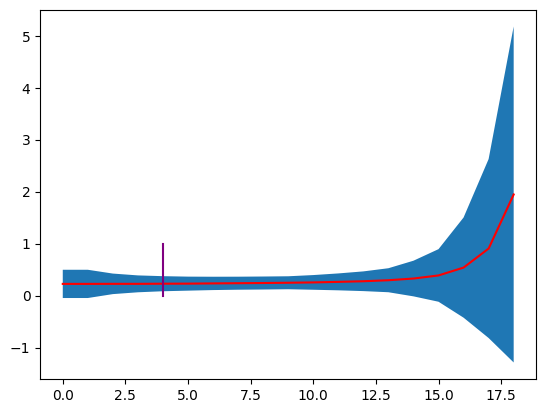

In [31]:
# for i in range(100):
#     print(i)
# xy = generate_custom_sine_wave(0,4)

inseed = 100
outseed = 100
n=20
a = gen(outseed,n,inseed,'se')


# train,test = rand_train(xy,0,1)
# print(len(train))
# print(len(test))
# a = table100to0(xy,2000,'rmse',5)
# print(a)
avg = a.loc[outseed*inseed].tolist()[2:]
sd = a.loc[outseed*inseed+1].tolist()[2:]
# bias2 = (sum(avg)/len(avg))**2

x = [i for i in range(0,n)]
# print(avg)
# print(sd)
# print(x)
sd.insert(0,sd[0])
avg.insert(0,avg[0])
Eout = [avg[i] for i in range(len(sd))]


# plt.xticks([0,10,20,30,40,50,60,70,80,90])
# plt.yticks([0,0.5,1])
# plt.xlim([1,95])
# plt.ylim([0,1])
plt.fill_between(x,[Eout[i] - sd[i] for i in range(len(sd))],[Eout[i] + sd[i] for i in range(len(sd))])
plt.plot(x,Eout,color = 'red')
plt.plot([n/5 for _ in range(n)],np.linspace(0,1,n),color = 'purple')
plt.show()

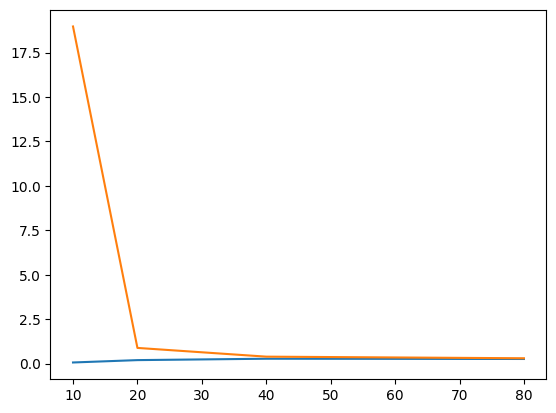

In [32]:
x = [10,20,40,80]
y1 = [0.0607,0.1936,0.2718,0.2578]
y2 = [18.9726,0.8802,0.3884,0.2979]
plt.plot(x,y1)
plt.plot(x,y2)